In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# The Hong-Ou-Mandel effect - two-photon interference

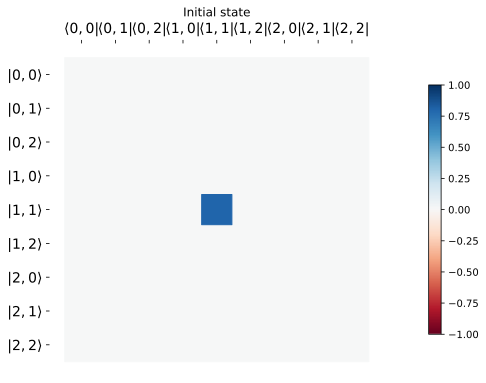

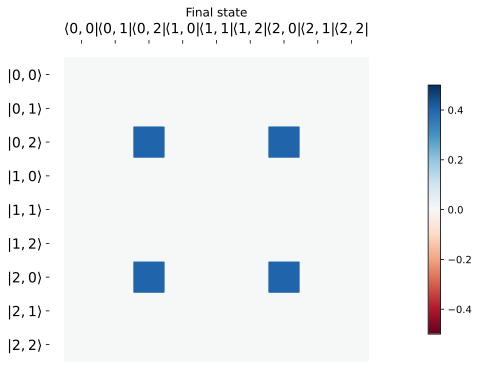

In [2]:
# Parameters
N = 3 # Dimension of the Hilbert space
theta = np.pi / 4  # 50:50 beam splitter

# Operators
a = destroy(N)  # mode a
b = destroy(N)  # mode b
B = (1j * theta * (tensor(a.dag(), b) + tensor(a, b.dag()))).expm()  # Beam splitter operator

initial_state = tensor(fock(N, 1), fock(N, 1))  # Initial state: ｜1>|1>
final_state = B * initial_state  # Final state after the beam splitter: B|1>|1>
hinton(ket2dm(initial_state), title='Initial state') # Plot the initial state
hinton(ket2dm(final_state), title='Final state') # Plot the final state
plt.show()

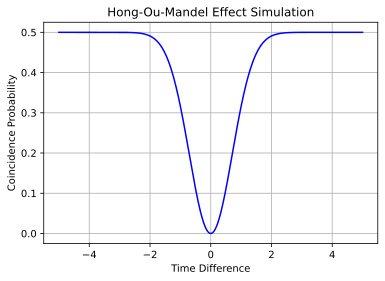

In [3]:
# Constants
delta_t_range = np.linspace(-5, 5, 1000)  # Time difference range between two photons
visibility = 1.0  # Visibility of the HOM dip, can be less than 1 due to imperfections

# HOM interference formula
# Probability of coincidence counts as a function of time difference
def hom_dip(delta_t, visibility=1.0):
    return 0.5 * (1 - visibility * np.exp(-delta_t**2))

# Calculate probabilities
probabilities = hom_dip(delta_t_range, visibility)

# Plotting
plt.figure(figsize=(6, 4))
plt.plot(delta_t_range, probabilities, 'blue')
plt.xlabel('Time Difference')
plt.ylabel('Coincidence Probability')
plt.title('Hong-Ou-Mandel Effect Simulation')
plt.grid(True)
plt.show()